In [1]:
from UTILITY_quickstart import *
import json

In [2]:
tao = initializeTao(
    loadDefaultLatticeTF = False
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Not using setLattice(). Golden lattice
WARNING! No beam file is specified!
Number of macro particles defined by input file
Beam created, written to /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/beams/activeBeamFile.h5, and reinit to tao


## Checking which elements may auto-compensate as energy changes

In [3]:
totalNumElements = len(tao.lat_ele_list())

combinedEleData = [ tao.ele_head(i) | tao.ele_gen_attribs(i) for i in range(totalNumElements) ]

In [4]:
uniqueTypes = []
for d in combinedEleData:
    if "field_master" in d:
        print( d["key"], d["name"], d["field_master"] ) 
        uniqueTypes.append(d["key"])
set(uniqueTypes)

Solenoid SOL10111 False
Solenoid SOL10121#1 False
VKicker YC10122 False
HKicker XC10121 False
Multipole SQ10122 False
Multipole CQ10121 False
Solenoid SOL10121#2 False
HKicker XC10221 False
VKicker YC10222 False
Lcavity L0AF#1 False
Lcavity L0AF#2 False
VKicker YC10312 False
HKicker XC10311 False
Lcavity L0AF#3 False
Lcavity L0AF#4 False
Lcavity L0AF#5 False
Quadrupole QA10361 False
Quadrupole QA10371#1 False
Quadrupole QA10371#2 False
Lcavity L0BF#1 False
Lcavity L0BF#2 False
VKicker YC10382 False
HKicker XC10381 False
Lcavity L0BF#3 False
Lcavity L0BF#4 False
VKicker YC10412 False
HKicker XC10411 False
Lcavity L0BF#5 False
Lcavity L0BF#6 False
Quadrupole QE10425#1 False
Quadrupole QE10425#2 False
Quadrupole QE10441 False
Sbend BCX10451 False
Sbend BCX10461 False
Wiggler UM10466#1 False
Wiggler UM10466#2 False
Sbend BCX10475 False
Sbend BCX10481 False
Crab_Cavity TCY10490#1 False
VKicker YC10492 False
HKicker XC10491 False
Crab_Cavity TCY10490#2 False
Quadrupole QE10511#1 False
Quadru

{'Crab_Cavity',
 'HKicker',
 'Lcavity',
 'Multipole',
 'Quadrupole',
 'Sbend',
 'Sextupole',
 'Solenoid',
 'VKicker',
 'Wiggler'}

## Prevent magnets from autocompensating as we change energy

In [5]:
quadNameList =  ["Q5FF", "Q4FF", "Q3FF", "Q2FF", "Q1FF", "Q0FF", "Q0D", "Q1D", "Q2D"]
[(i, getQuadkG(tao,i)) for i in quadNameList]

[('Q5FF', -71.83776109541046),
 ('Q4FF', -81.2517605587486),
 ('Q3FF', 99.22574010962327),
 ('Q2FF', 126.35310735529067),
 ('Q1FF', -235.2189327906117),
 ('Q0FF', 126.35310735529067),
 ('Q0D', -109.694769332636),
 ('Q1D', 180.862985286722),
 ('Q2D', -109.694769332636)]

In [6]:
getBendkG(tao, "B2LE")

-10.94420506224771

In [7]:
#disableAutoQuadEnergyCompensation(tao)
disableAutoMagnetEnergyCompensation(tao)

### Check

In [8]:
combinedEleData = [ tao.ele_head(i) | tao.ele_gen_attribs(i) for i in range(totalNumElements) ]
for d in combinedEleData:
    if "field_master" in d:
        print( d["key"], d["name"], d["field_master"] ) 
        uniqueTypes.append(d["key"])

Solenoid SOL10111 True
Solenoid SOL10121#1 False
VKicker YC10122 True
HKicker XC10121 True
Multipole SQ10122 True
Multipole CQ10121 True
Solenoid SOL10121#2 False
HKicker XC10221 True
VKicker YC10222 True
Lcavity L0AF#1 False
Lcavity L0AF#2 False
VKicker YC10312 True
HKicker XC10311 True
Lcavity L0AF#3 False
Lcavity L0AF#4 False
Lcavity L0AF#5 False
Quadrupole QA10361 True
Quadrupole QA10371#1 False
Quadrupole QA10371#2 False
Lcavity L0BF#1 False
Lcavity L0BF#2 False
VKicker YC10382 True
HKicker XC10381 True
Lcavity L0BF#3 False
Lcavity L0BF#4 False
VKicker YC10412 True
HKicker XC10411 True
Lcavity L0BF#5 False
Lcavity L0BF#6 False
Quadrupole QE10425#1 False
Quadrupole QE10425#2 False
Quadrupole QE10441 True
Sbend BCX10451 True
Sbend BCX10461 True
Wiggler UM10466#1 False
Wiggler UM10466#2 False
Sbend BCX10475 True
Sbend BCX10481 True
Crab_Cavity TCY10490#1 False
VKicker YC10492 True
HKicker XC10491 True
Crab_Cavity TCY10490#2 False
Quadrupole QE10511#1 False
Quadrupole QE10511#2 False


## L3 error

4500000000.0


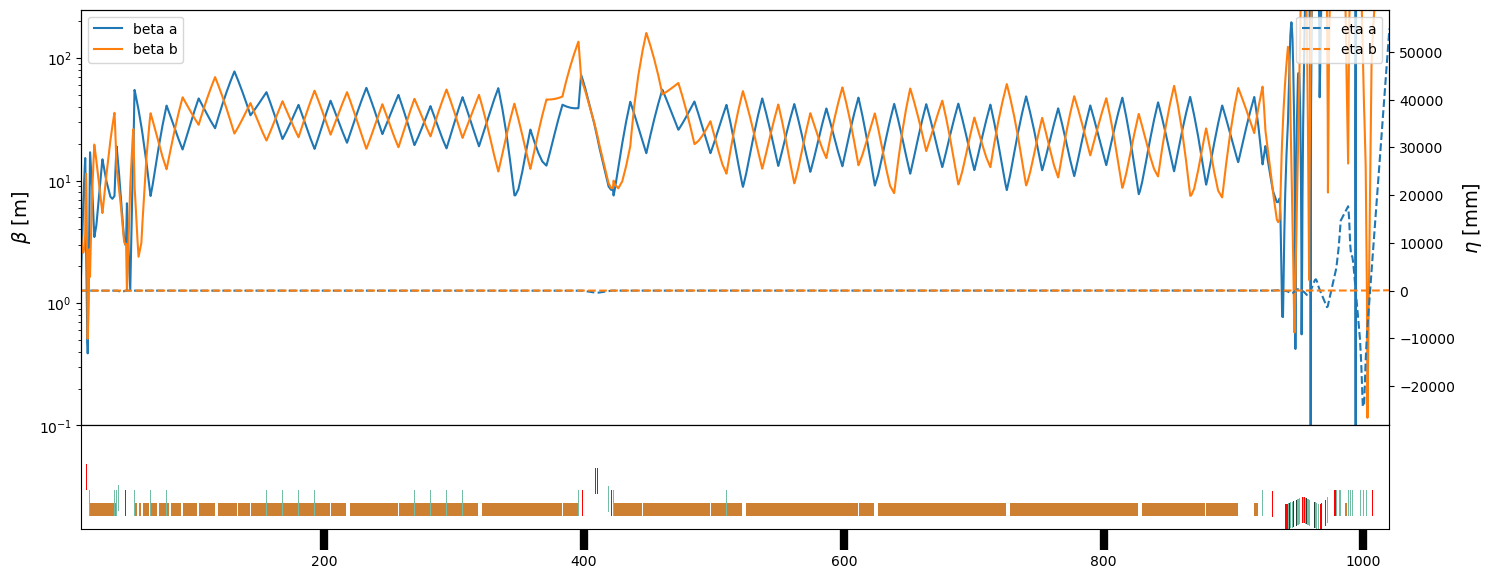

4600000000.0


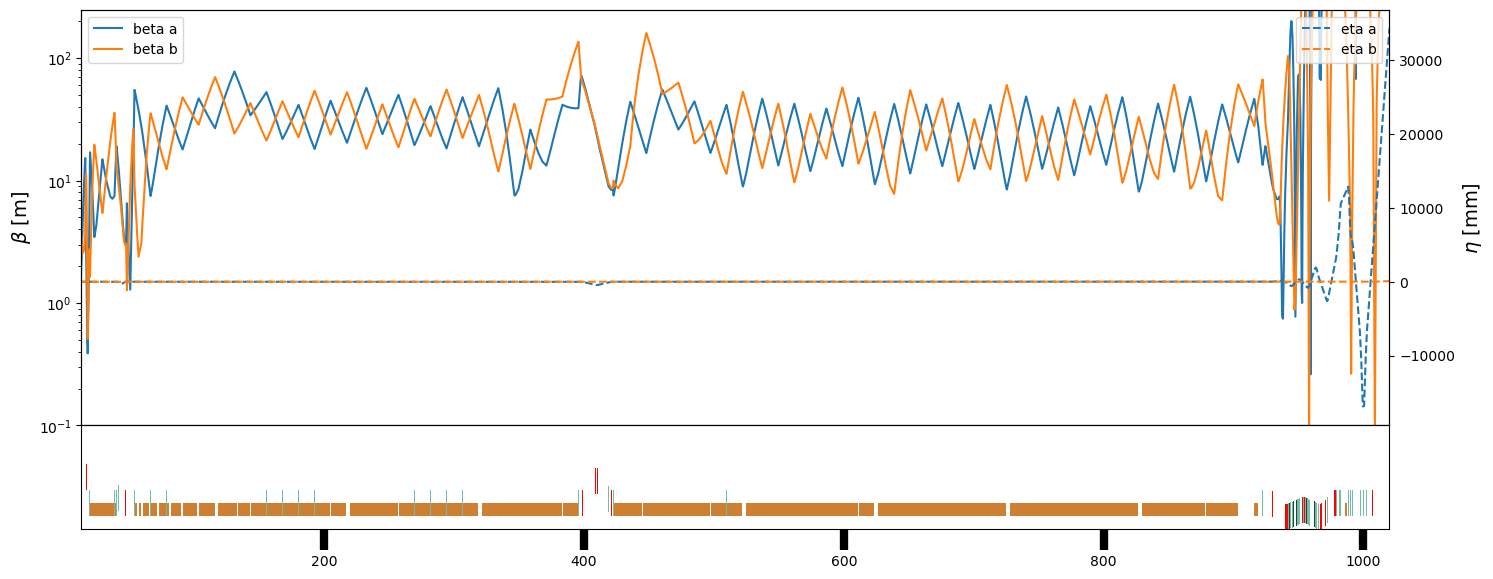

4700000000.0


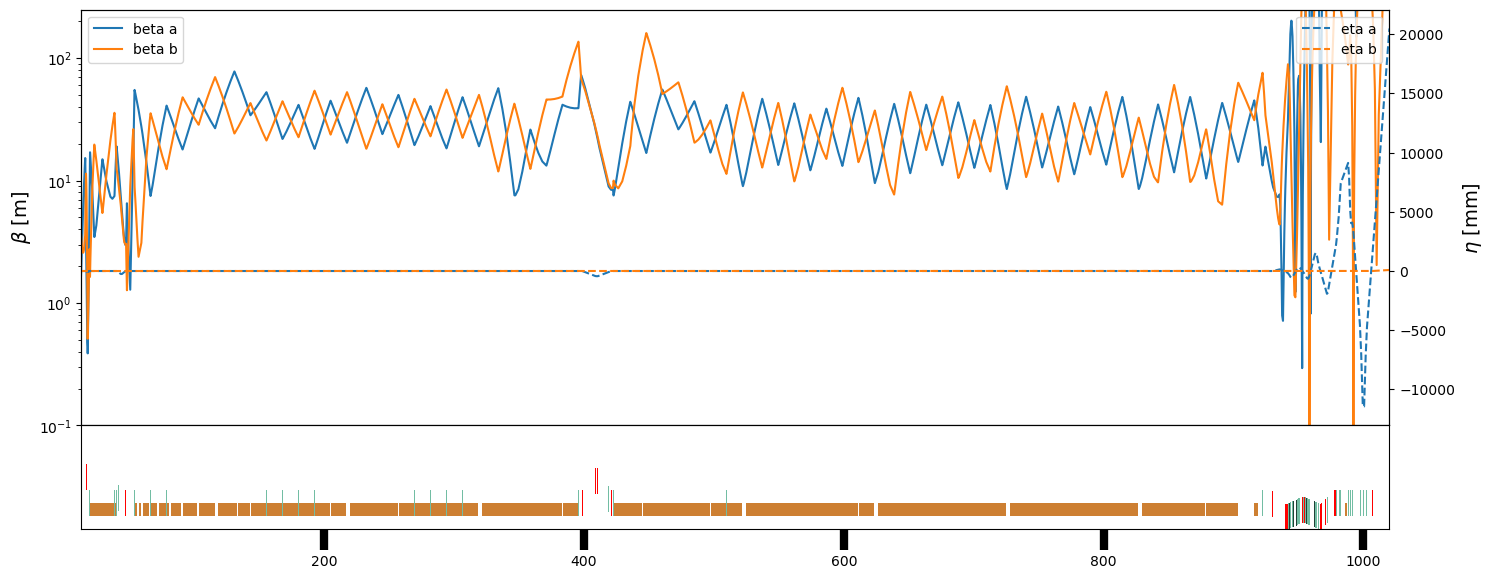

4800000000.0


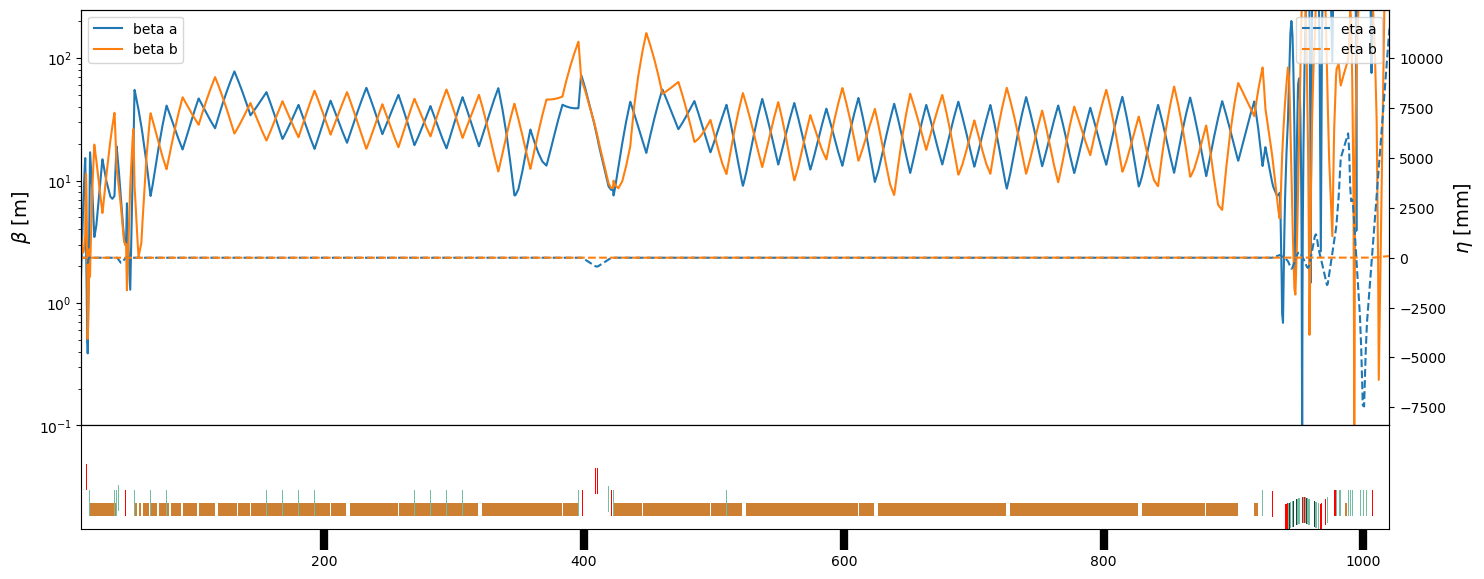

4900000000.0


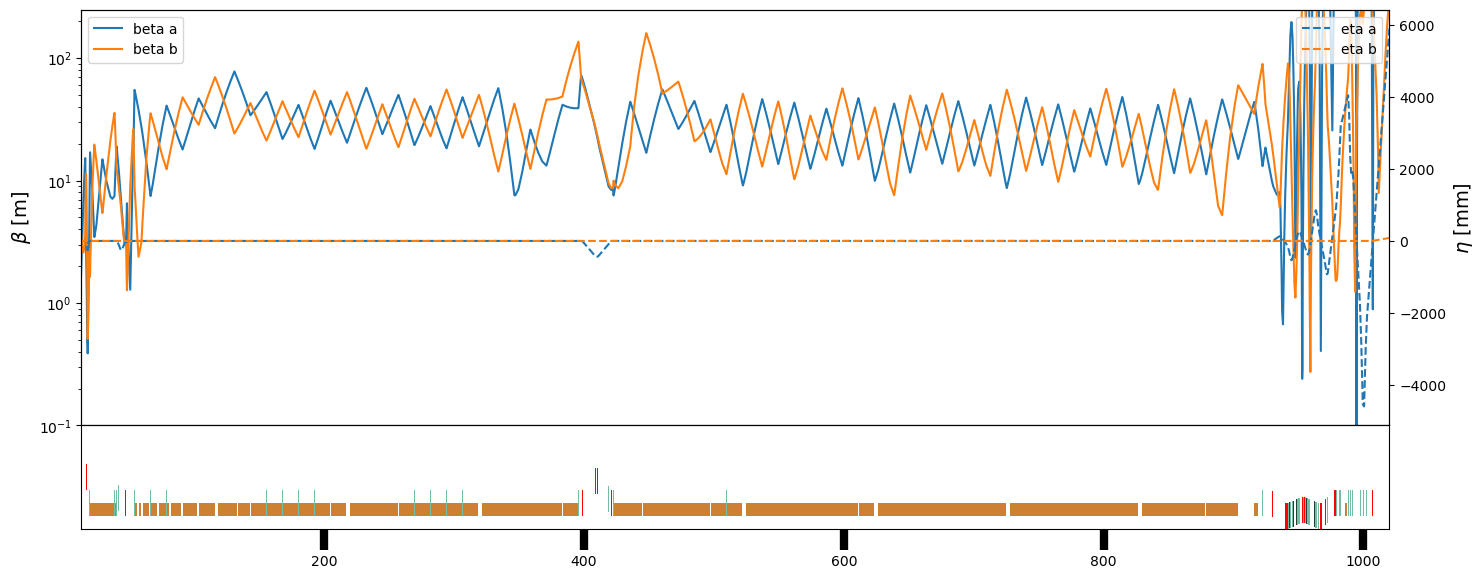

5000000000.0


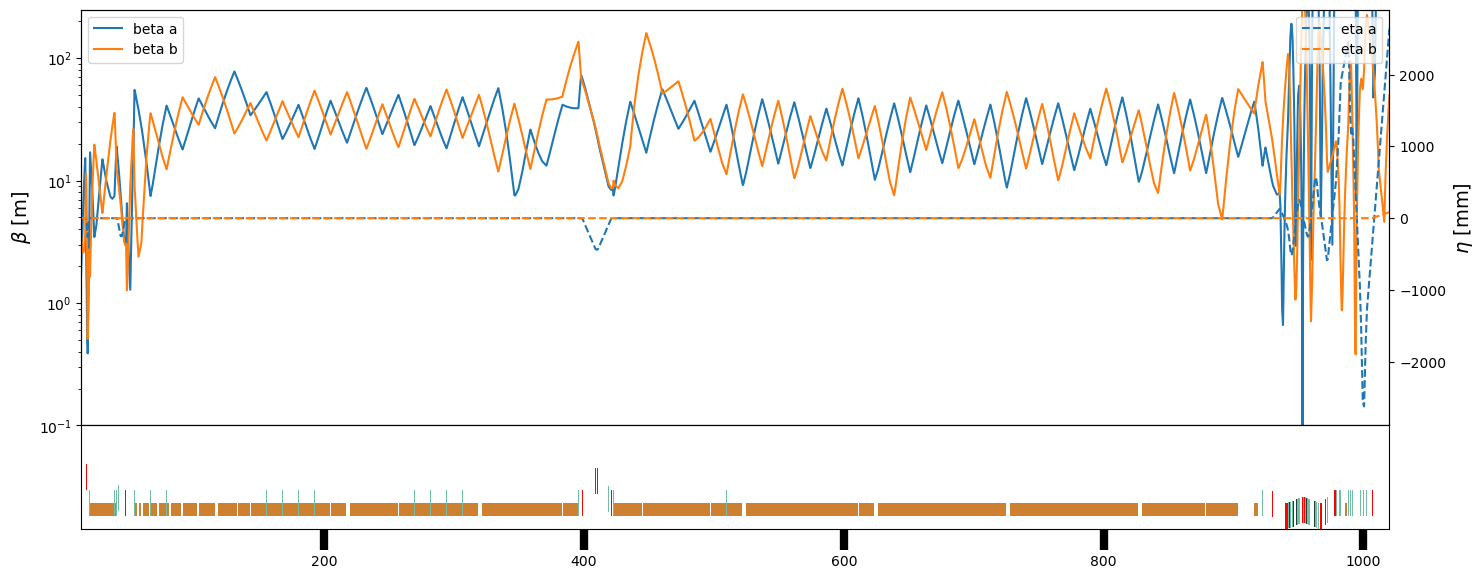

5100000000.0


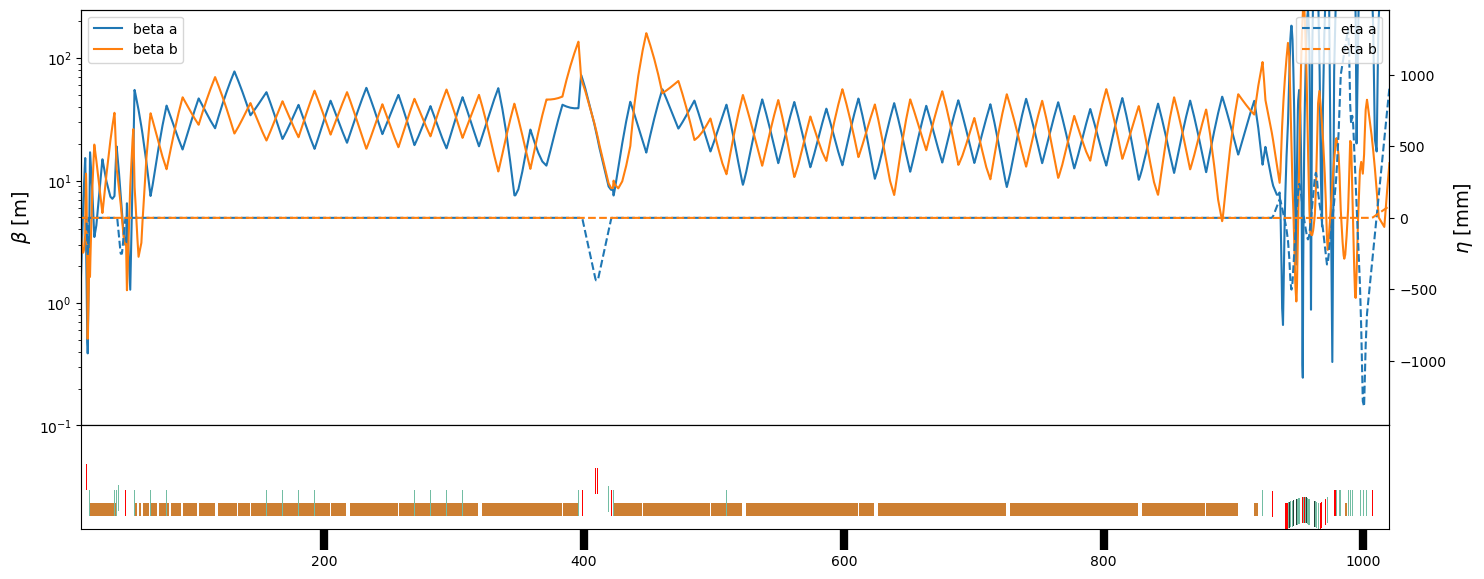

5200000000.0


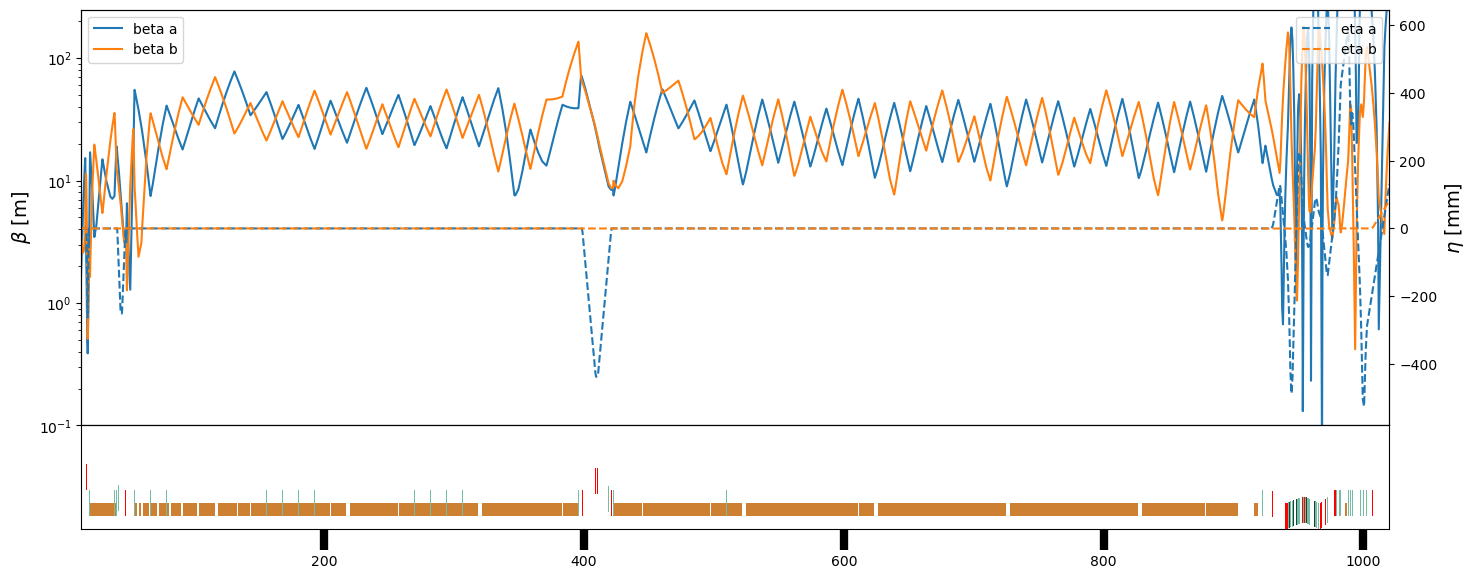

5300000000.0


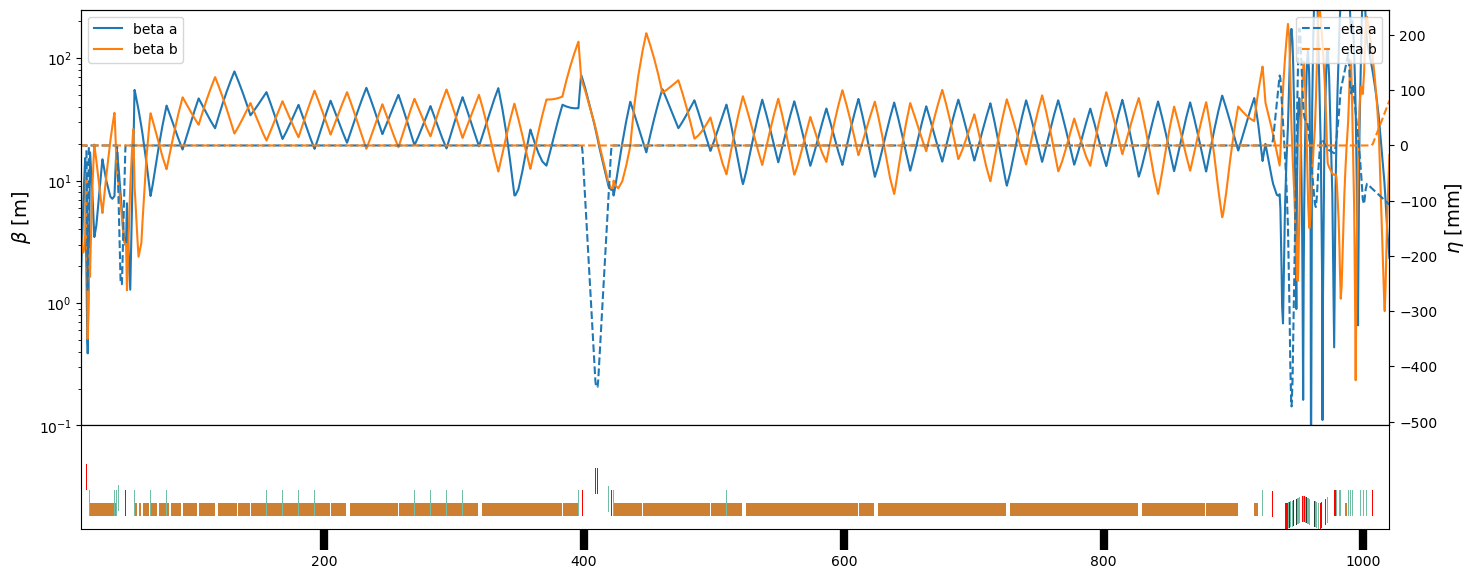

5400000000.0


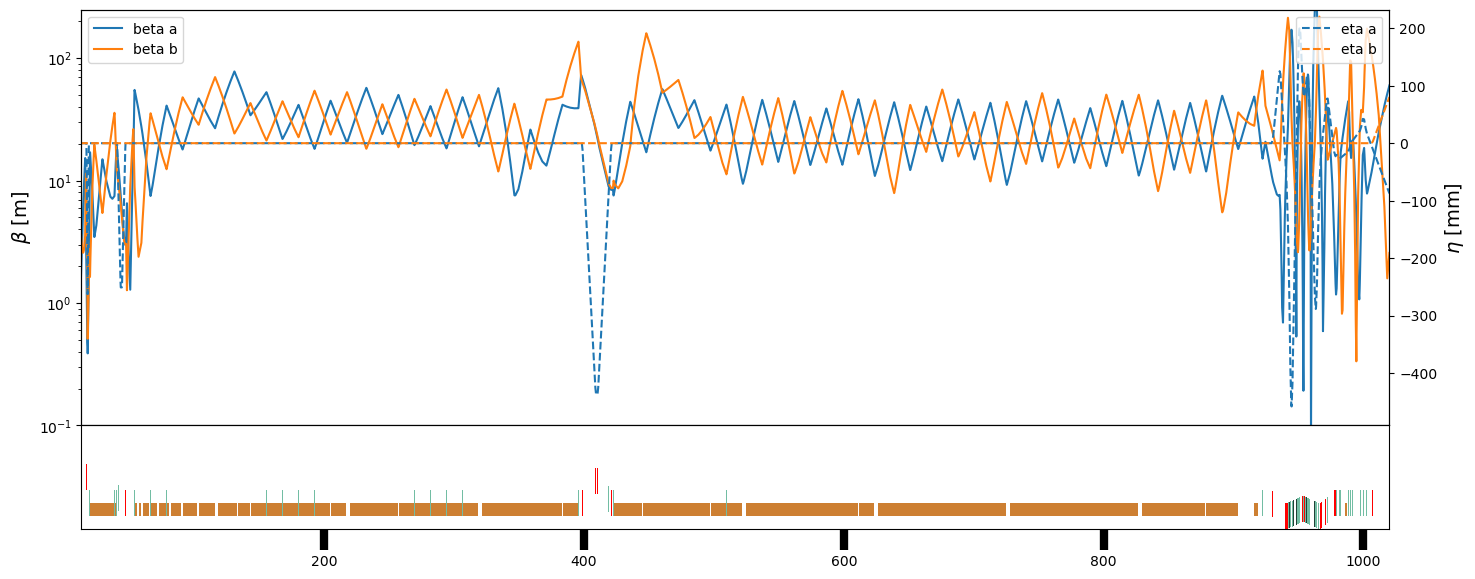

5500000000.0


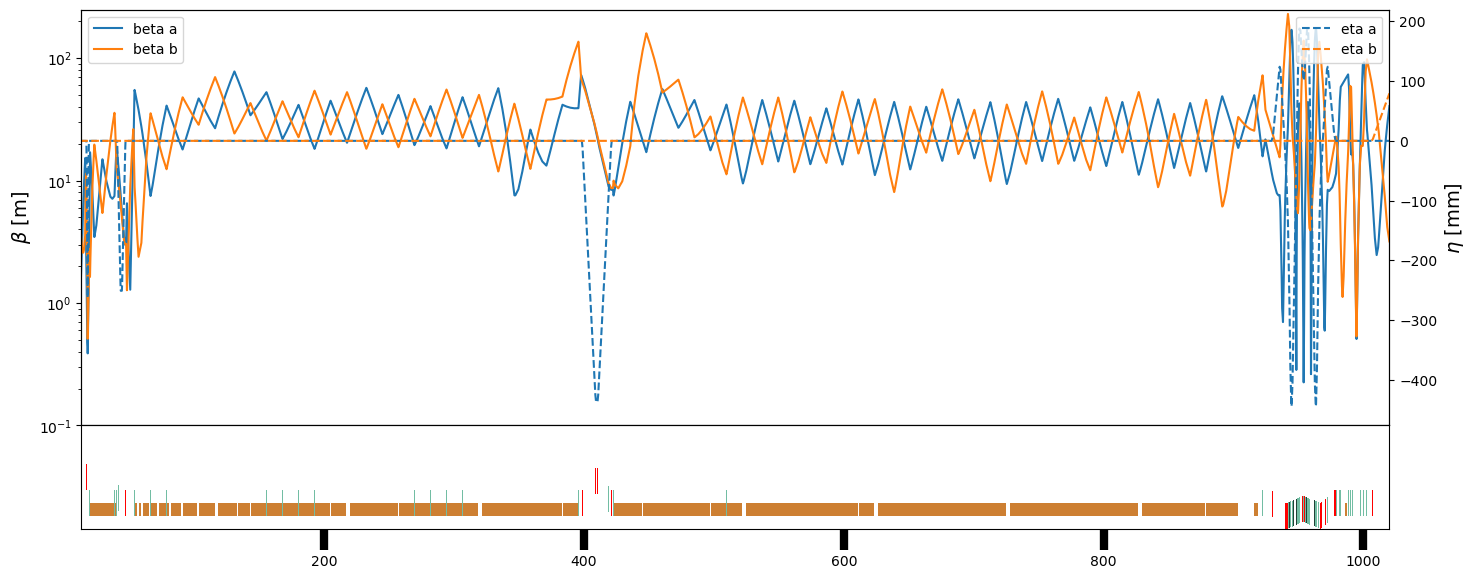

5600000000.0


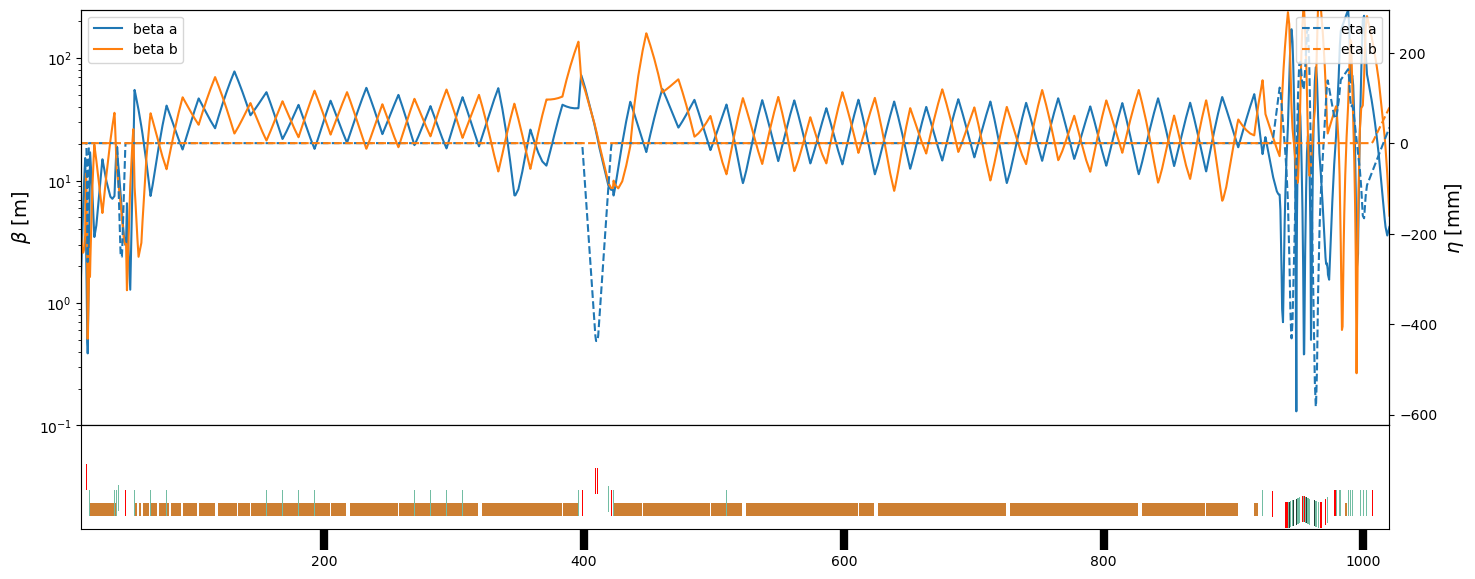

5700000000.0


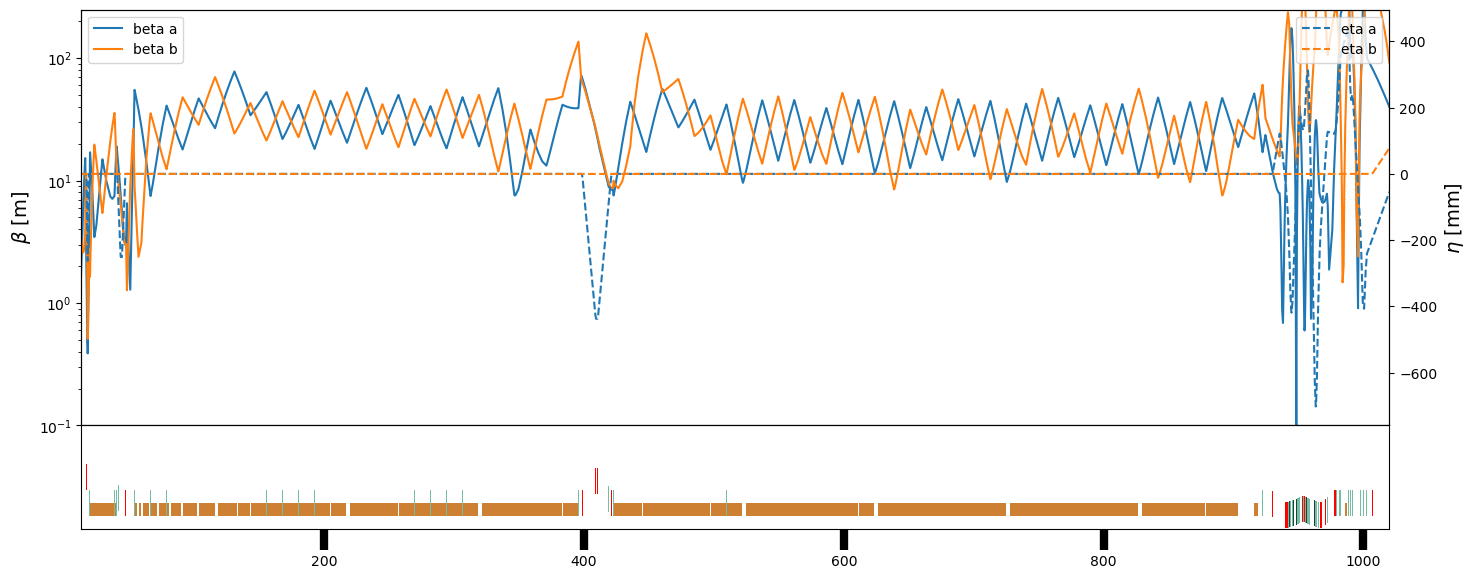

5800000000.0


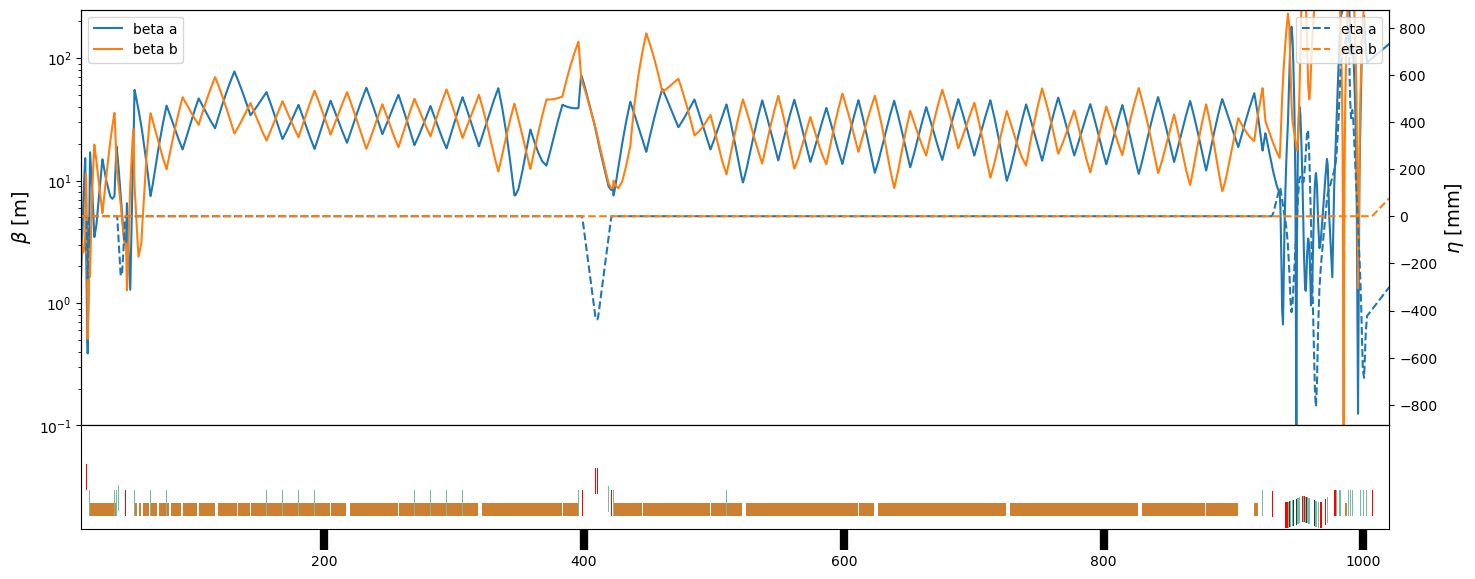

5900000000.0


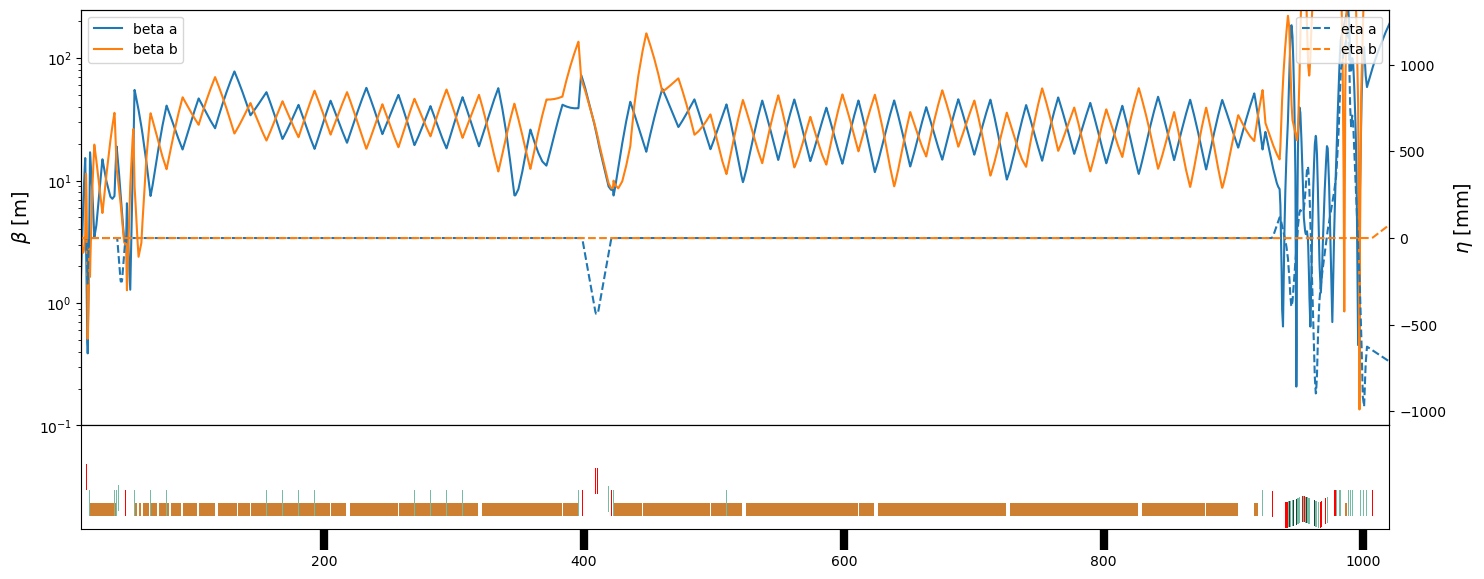

6000000000.0


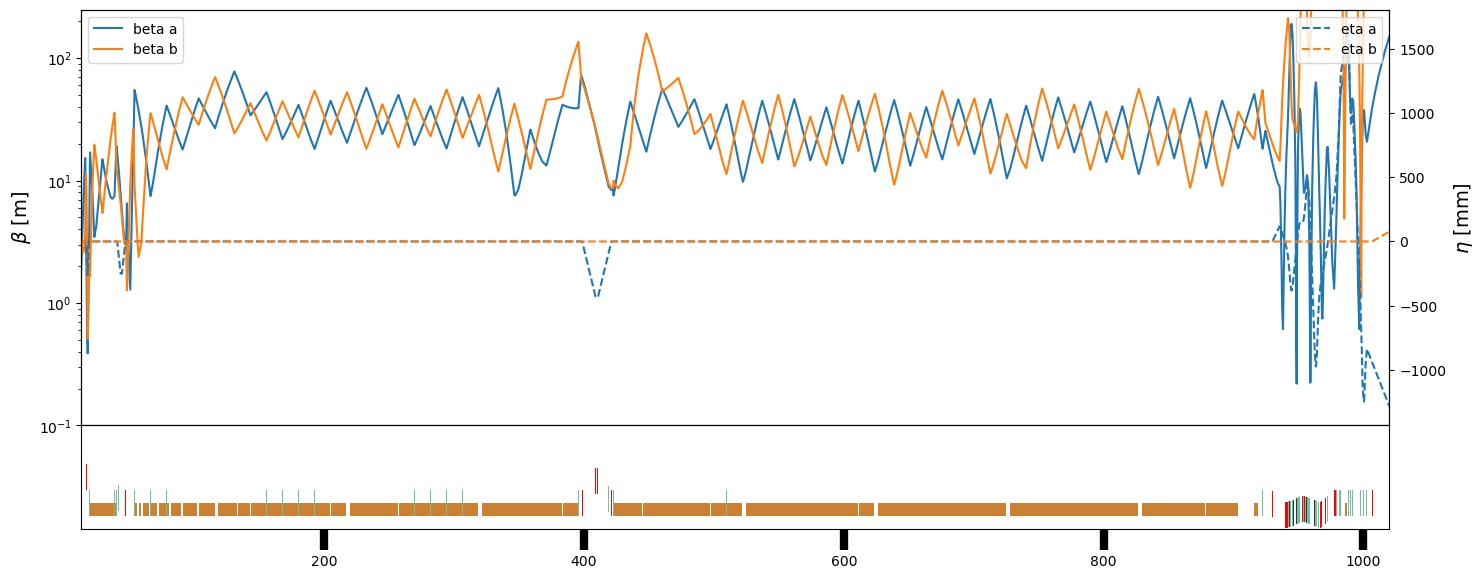

6100000000.0


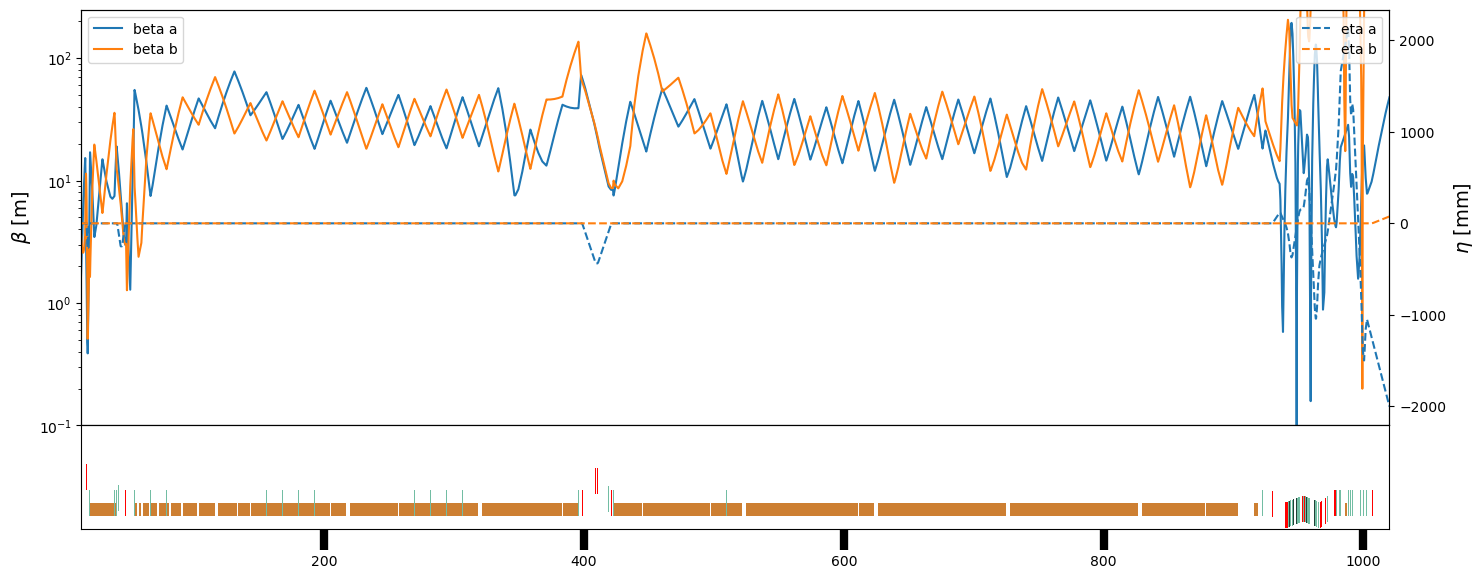

6200000000.0


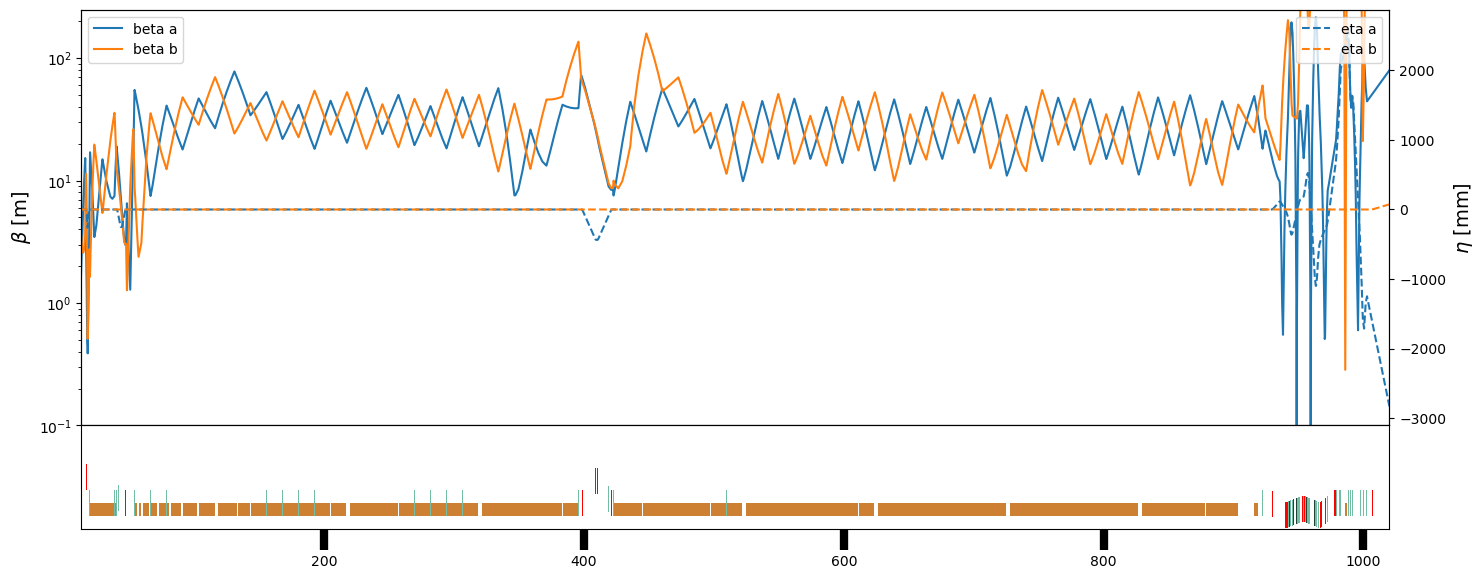

6300000000.0


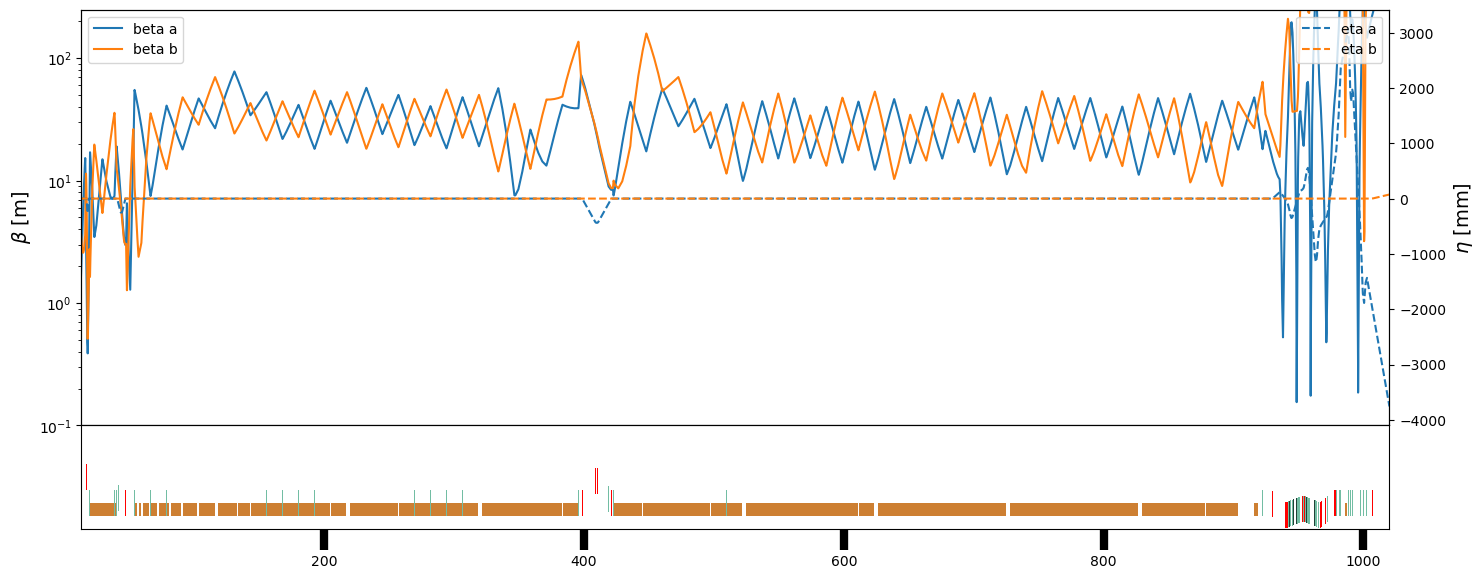

6400000000.0


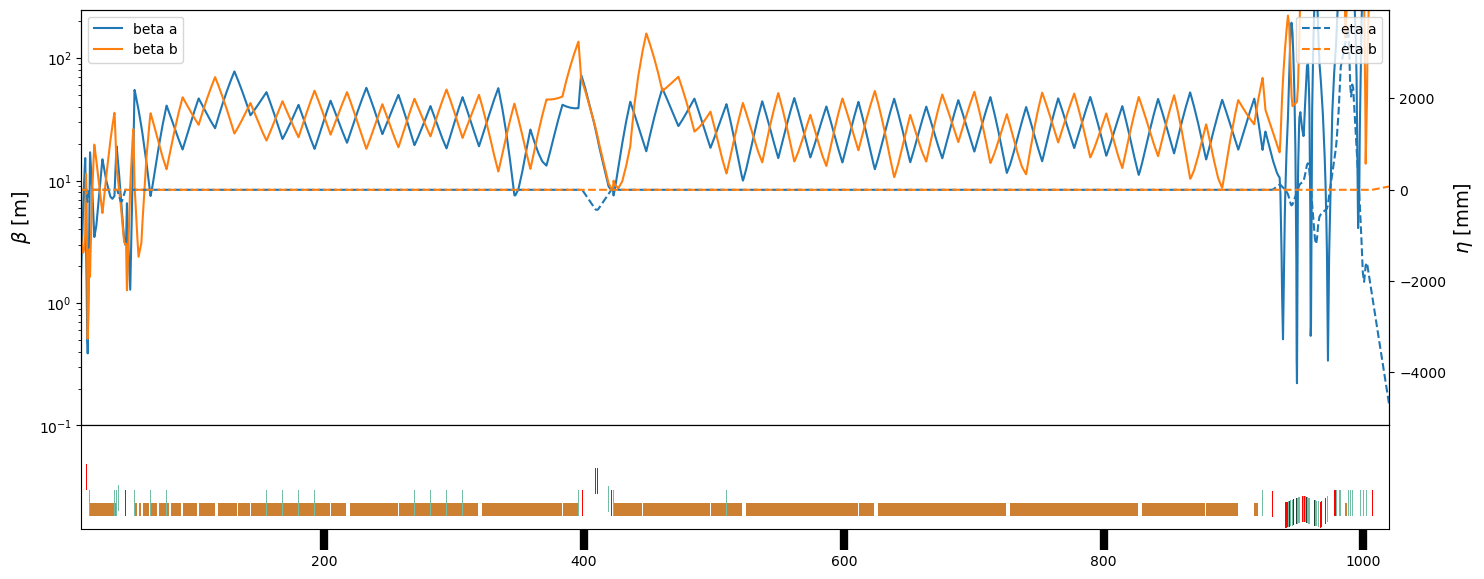

6500000000.0


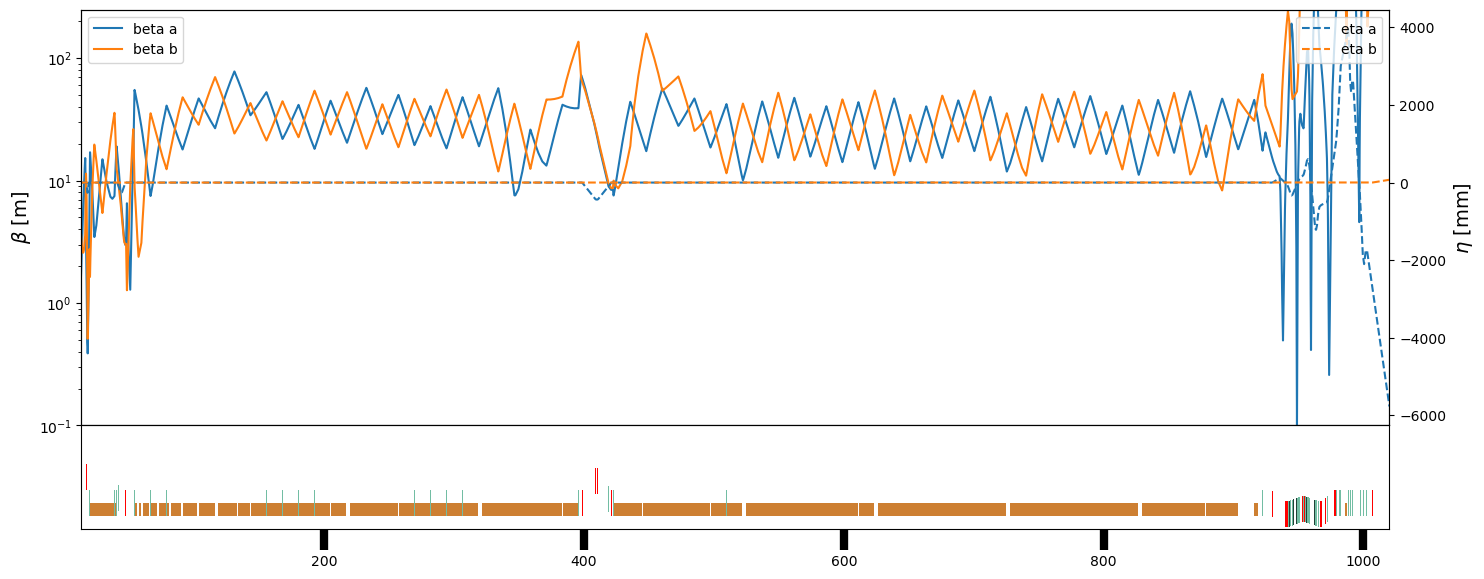

In [9]:
results = []

for L3Voltage in np.arange(4.5e9, 6.6e9, 0.1e9):

    print(L3Voltage)
    setLinacGradientAuto(tao, "L3", L3Voltage)

    floorplanPlot(tao)

    
    
    for s in np.arange( -3, 3, 0.01 ):

        twissData = tao.twiss_at_s( ele = "PENT", s_offset = s )
        newLine = {
            "L3Voltage" : L3Voltage,
            "s" : s,
            "betaX" : twissData["beta_a"],
            "betaY" : twissData["beta_b"],
        }
        #print(newLine)
        results.append(newLine)

with open("/Users/nmajik/twiss_results_L3.json", "w") as f:
    json.dump(results, f, indent=2)

In [10]:
getBendkG(tao, "B2LE")

-10.94420506224771

## Patch error

In [11]:
setLinacGradientAuto(tao, "L3", 5.5e9)

In [12]:
results = []

for energy in np.arange(9.0e9, 11.1e9, 0.1e9):
    tao.cmd(f"set ele patch_sector20 e_tot_set = {energy}")

    #tao.cmd(f"set ele patch_sector20 e_tot_offset = {10e9 - energy}")

    
    
    for s in np.arange( -3, 3, 0.01 ):

        twissData = tao.twiss_at_s( ele = "PENT", s_offset = s )
        newLine = {
            "energy" : energy,
            "s" : s,
            "betaX" : twissData["beta_a"],
            "betaY" : twissData["beta_b"],
        }
        #print(newLine)
        results.append(newLine)



with open("/Users/nmajik/twiss_results_patch.json", "w") as f:
    json.dump(results, f, indent=2)

In [13]:
getBendkG(tao, "B2LE")

-10.94420506224771

## Clean start, PATCH sanity check

In [14]:
from UTILITY_quickstart import *
import json

In [15]:
tao = initializeTao(
    loadDefaultLatticeTF = False
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Not using setLattice(). Golden lattice
WARNING! No beam file is specified!
Number of macro particles defined by input file
Beam created, written to /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/beams/activeBeamFile.h5, and reinit to tao


In [16]:
disableAutoMagnetEnergyCompensation(tao)

In [17]:
getQuadkG(tao, "Q5FF")

-71.83776109541046

In [18]:
tao.ele_twiss("MFFF")

{'mode_flip': False,
 'beta_a': 11.5533562066009,
 'alpha_a': -0.640788640830743,
 'gamma_a': 0.122095264526837,
 'phi_a': 71.31011993097,
 'eta_a': 1.82993853116333e-05,
 'etap_a': 1.18535480249718e-06,
 'beta_b': 25.2039557159784,
 'alpha_b': -1.56858472563668,
 'gamma_b': 0.137298211459199,
 'phi_b': 56.2536406733655,
 'eta_b': -2.27197431822392e-17,
 'etap_b': -4.93465667199839e-20,
 'eta_x': 1.82993853116333e-05,
 'etap_x': 1.18535480249718e-06,
 'eta_y': -2.27197534407484e-17,
 'etap_y': -4.93522682312884e-20}

In [19]:
tao.ele_twiss("PENT")

{'mode_flip': False,
 'beta_a': 0.500113514905187,
 'alpha_a': -8.61413026615049e-05,
 'gamma_a': 1.9995460582782,
 'phi_a': 73.1003856252222,
 'eta_a': -4.29100544671707e-07,
 'etap_a': -7.60864677687215e-06,
 'beta_b': 0.499955681369933,
 'alpha_b': 0.000116201966385052,
 'gamma_b': 2.00017731724298,
 'phi_b': 60.4082301501082,
 'eta_b': -6.77061438266227e-18,
 'etap_b': -1.31862568529448e-17,
 'eta_x': -4.29100544671707e-07,
 'etap_x': -7.60864677687215e-06,
 'eta_y': -6.77059836943936e-18,
 'etap_y': -1.31862402801866e-17}

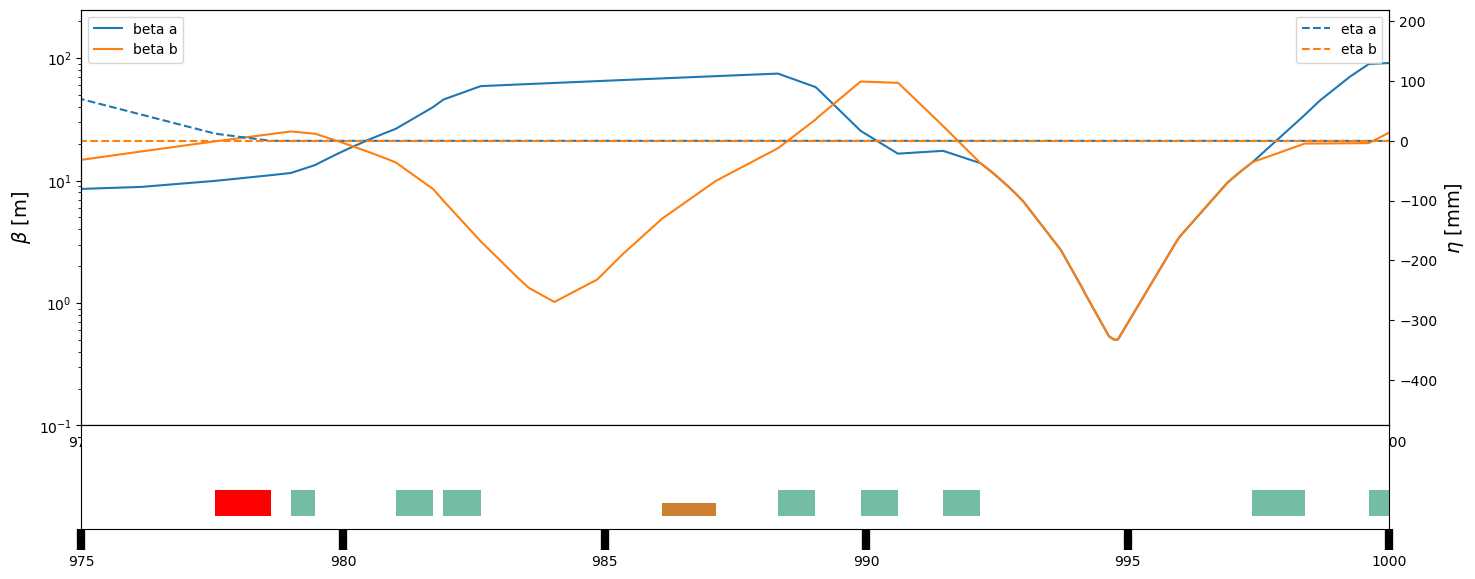

In [20]:
floorplanPlot(tao, zmin = 975, zmax = 1000)

In [21]:
tao.cmd(f"set ele patch_sector20 e_tot_set = {8e9}")

[]

In [22]:
getQuadkG(tao, "Q5FF")

-71.83776109541046

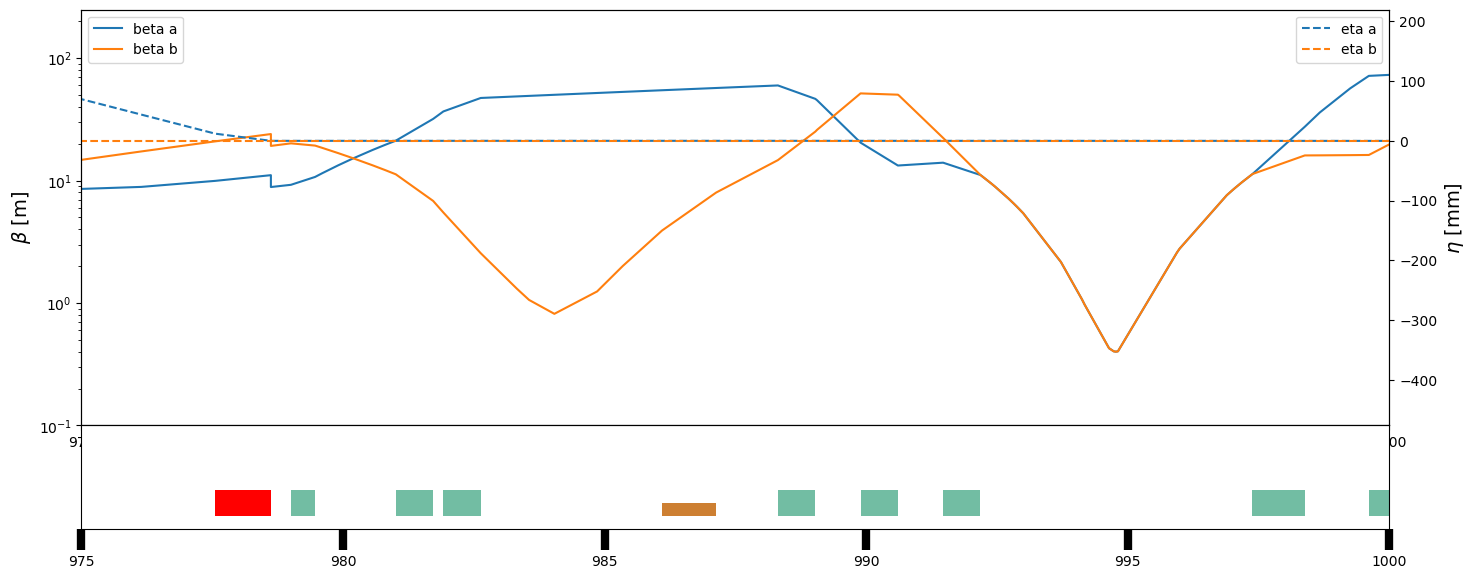

In [23]:
floorplanPlot(tao, zmin = 975, zmax = 1000)

In [24]:
tao.ele_twiss("MFFF")

{'mode_flip': False,
 'beta_a': 9.24268495849023,
 'alpha_a': -0.640788640830743,
 'gamma_a': 0.152619080770674,
 'phi_a': 71.31011993097,
 'eta_a': 2.28742316563477e-05,
 'etap_a': 1.8521168816233e-06,
 'beta_b': 20.1631645579691,
 'alpha_b': -1.56858472563668,
 'gamma_b': 0.171622764450088,
 'phi_b': 56.2536406733655,
 'eta_b': -2.83215787855263e-17,
 'etap_b': -7.71040106132696e-20,
 'eta_x': 2.28742316563477e-05,
 'etap_x': 1.8521168816233e-06,
 'eta_y': -2.83215916086629e-17,
 'etap_y': -7.71129192246959e-20}

In [25]:
tao.ele_twiss("PENT")

{'mode_flip': False,
 'beta_a': 0.400090811630206,
 'alpha_a': -8.61413026631008e-05,
 'gamma_a': 2.49943257468406,
 'phi_a': 73.1003856252222,
 'eta_a': -5.36375681239042e-07,
 'etap_a': -1.18885106063343e-05,
 'beta_b': 0.3999645448021,
 'alpha_b': 0.000116201966399165,
 'gamma_b': 2.50022164839058,
 'phi_b': 60.4082301501082,
 'eta_b': -6.49491882847387e-18,
 'etap_b': -1.90791226564953e-17,
 'eta_x': -5.36375681239042e-07,
 'etap_x': -1.18885106063343e-05,
 'eta_y': -6.49489881194522e-18,
 'etap_y': -1.90790967615607e-17}

In [26]:
tao.cmd("show ele PENT -all")

['Element # 1534',
 'Element Name: PENT',
 'Key: Marker',
 'S_start, S:    994.772815,    994.772815',
 'Ref_time_start, Ref_time:  3.318222E-06,  3.318222E-06',
 '',
 'Attribute values:',
 '    1  L                           =  0.0000000E+00 m',
 '    2  TILT                        =  0.0000000E+00 rad      60  TILT_TOT                    =  0.0000000E+00 rad',
 '    3  X_GAIN_ERR                  =  0.0000000E+00 m         4  Y_GAIN_ERR                  =  0.0000000E+00 m',
 '    5  CRUNCH                      =  0.0000000E+00 rad      21  CRUNCH_CALIB                =  0.0000000E+00 rad',
 '    6  NOISE                       =  0.0000000E+00          26  N_SAMPLE                    =  0.0000000E+00',
 '    7  OSC_AMPLITUDE               =  0.0000000E+00 m',
 '    8  X_GAIN_CALIB                =  0.0000000E+00 m        20  Y_GAIN_CALIB                =  0.0000000E+00 m',
 '   22  X_OFFSET_CALIB              =  0.0000000E+00 m        23  Y_OFFSET_CALIB              =  0.0000000E+00 m